Cell 1: Import library 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For better visualization
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


Cell 2: Load Datasets


In [2]:
# Load the dataset
# Make sure the csv file is in the same folder
data = pd.read_csv("austin_weather.csv")

# Display the first 5 rows
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


Cell 3: Data cleaning 


In [3]:
# Drop unnecessary columns (keeping useful numeric weather attributes)
# We will use Date, TempAvgF, HumidityAvgPercent, WindAvgMPH, and PrecipitationSumInches
data = data[['Date', 'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'PrecipitationSumInches']]

# Handling 'T' (Trace amounts of rain) and '-' (Missing data)
# Replace 'T' with 0.0 (assuming trace rain is negligible for prediction)
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].replace('T', '0.0')

# Replace '-' with NaN so we can drop them easily
data = data.replace('-', np.nan)

# Drop rows with any missing values (NaN)
data.dropna(inplace=True)

# Convert columns to numeric types (integers/floats) because ML models need numbers
data['PrecipitationSumInches'] = pd.to_numeric(data['PrecipitationSumInches'])
data['TempAvgF'] = pd.to_numeric(data['TempAvgF'])
data['HumidityAvgPercent'] = pd.to_numeric(data['HumidityAvgPercent'])
data['WindAvgMPH'] = pd.to_numeric(data['WindAvgMPH'])

print("Data cleaning complete!")
data.info()

Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1318
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1316 non-null   object 
 1   TempAvgF                1316 non-null   int64  
 2   HumidityAvgPercent      1316 non-null   int64  
 3   WindAvgMPH              1316 non-null   int64  
 4   PrecipitationSumInches  1316 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 61.7+ KB


Cell 4: Sets targets and new features

In [4]:
# X contains input features (Temperature, Humidity, Wind Speed)
X = data[['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']]

# Y contains the target variable (Precipitation)
Y = data['PrecipitationSumInches']

# Reshaping Y to be a column vector (needed for sklearn)
Y = Y.values.reshape(-1, 1)

print("Features and Target set.")

Features and Target set.


Cell 5: Trends to visulalize

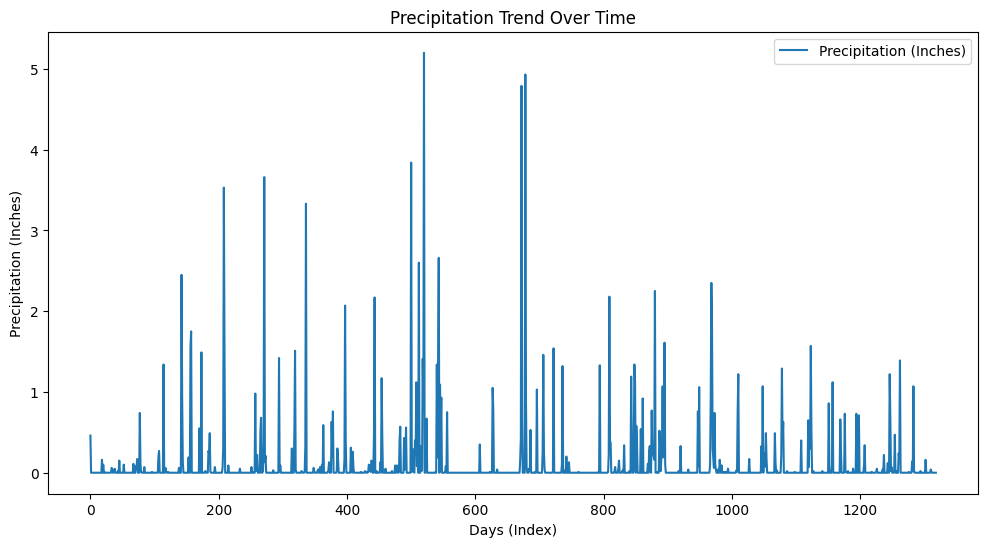

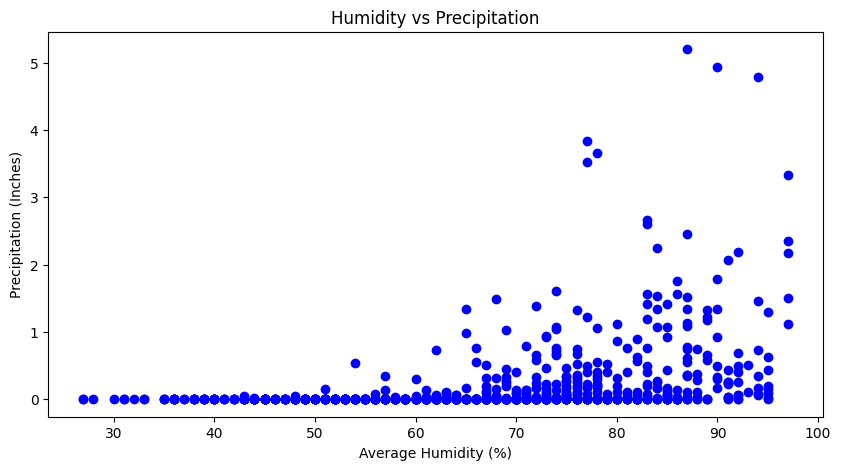

In [5]:
# Plotting Precipitation over time (using index as proxy for time)
plt.figure(figsize=(12, 6))
plt.plot(data['PrecipitationSumInches'], label='Precipitation (Inches)')
plt.title('Precipitation Trend Over Time')
plt.xlabel('Days (Index)')
plt.ylabel('Precipitation (Inches)')
plt.legend()
plt.show()

# Scatter plot: Humidity vs Precipitation
plt.figure(figsize=(10, 5))
plt.scatter(data['HumidityAvgPercent'], data['PrecipitationSumInches'], color='blue')
plt.title('Humidity vs Precipitation')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Precipitation (Inches)')
plt.show()

Cell 6: Linear Regression model

In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

# Inspecting coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Model trained successfully!
Coefficients: [[-0.00140407  0.01245275  0.01432268]]
Intercept: [-0.68477966]


Cell 7: pridiction and result

Model Performance:
Mean Absolute Error: 0.18305519664284103
Mean Squared Error: 0.11549350621102579


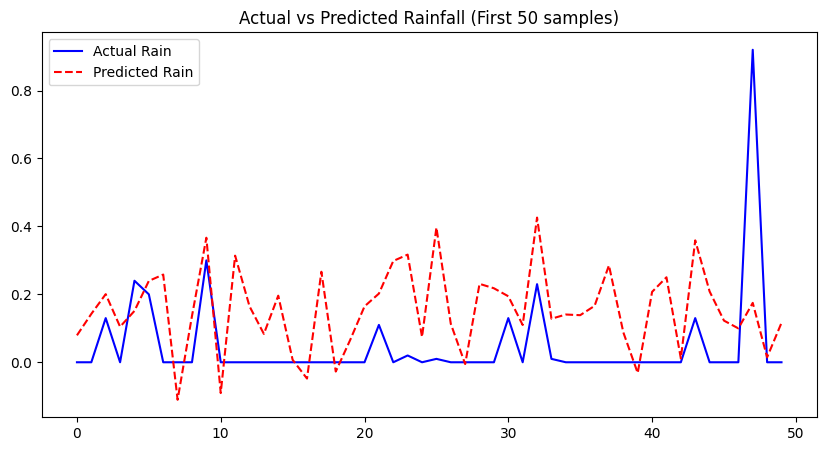

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics to see how good the model is
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Visualize Real vs Predicted values for a small subset
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Actual Rain', color='blue')
plt.plot(y_pred[:50], label='Predicted Rain', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Rainfall (First 50 samples)')
plt.legend()
plt.show()